In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
height=[5,5.11,5.6,5.9,4.8,5.8,5.3,5.8,5.5,5.6,5.5]
age=[45,26,30,34,40,36,19,28,23,32,38]
weight=[77,47,55,59,72,60,40,60,45,58,np.nan]
ids=np.arange(1,12)
data=pd.DataFrame([ids,height,age,weight])

In [3]:
data=data.T

In [4]:
data

,0,1,2,3
0,1.0,5.00,45.0,77.0
1,2.0,5.11,26.0,47.0
2,3.0,5.60,30.0,55.0
3,4.0,5.90,34.0,59.0
4,5.0,4.80,40.0,72.0
5,6.0,5.80,36.0,60.0
6,7.0,5.30,19.0,40.0
7,8.0,5.80,28.0,60.0
8,9.0,5.50,23.0,45.0
9,10.0,5.60,32.0,58.0


In [5]:
data.columns=["ID","Height","Age","Weight"]

In [6]:
data

,ID,Height,Age,Weight
0,1.0,5.00,45.0,77.0
1,2.0,5.11,26.0,47.0
2,3.0,5.60,30.0,55.0
3,4.0,5.90,34.0,59.0
4,5.0,4.80,40.0,72.0
5,6.0,5.80,36.0,60.0
6,7.0,5.30,19.0,40.0
7,8.0,5.80,28.0,60.0
8,9.0,5.50,23.0,45.0
9,10.0,5.60,32.0,58.0


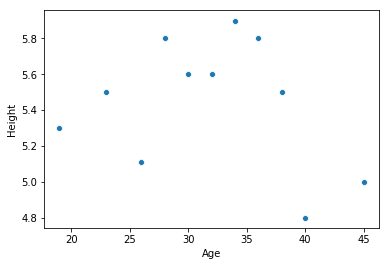

In [7]:
sns.scatterplot(data.Age,data.Height)

# KNN as Classifier

In [8]:
data=pd.read_csv("wisc_bc_data.csv")

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [10]:
data.shape

(569, 32)

In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [12]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [13]:
del(data['id'])

In [14]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [15]:
data.diagnosis=data.diagnosis.astype('category') 
# if we specify category as datatype then we need not do numerical encoding,we did like this because it is our output variable, if it was an input variable we need to do numerical encoding

In [16]:
data.dtypes

diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [17]:
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [18]:
data2=data.drop(columns='diagnosis',axis=1)

# drop the categorical column so that we can scale the data as per z score, we can only use numerical columns for scaling

In [19]:
data3=data2.apply(zscore)  # to convert all attributes to z scale , we do scaling because scaling is a method used to standardize the range of independent variables or features of data, for comparison of features

In [20]:
data3.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492


In [21]:
y=data.diagnosis
x=data3

y=np.array(y)         # type cast x and y to array
x=np.array(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [23]:
from sklearn import metrics

In [24]:
from sklearn.neighbors import KNeighborsClassifier  # for KNN as Classifier

In [25]:
NNH=KNeighborsClassifier(n_neighbors=21,metric='euclidean')     
# KNN object - neighbours value,we intially give the value as Sqrt(total number of rows)
# by default weight is uniform i.e unweighted voting method, if we need weighted voting use 'distance'
# metric is a type of distance metric that we can use

In [26]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [27]:
y_predict=NNH.predict(x_test)

In [28]:
pd.crosstab(y_test,y_predict)

col_0,B,M
row_0,,
B,98,2
M,8,63


In [29]:
accuracy=metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.9415204678362573


In [30]:
pd.DataFrame(y_test)[0].value_counts()

B    100
M     71
Name: 0, dtype: int64

In [31]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)    # recall is Sensitivity, True positive rate

              precision    recall  f1-score   support

           B       0.92      0.98      0.95       100
           M       0.97      0.89      0.93        71

   micro avg       0.94      0.94      0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [32]:
#Sensitivity or Recall or TPR= TP/(TP+FN)
#Specificity or TNR = TN/(TN+FP)  

# KNN as a Regressor

In [33]:
mpg_df=pd.read_csv("car-mpg.csv")

In [34]:
temp=pd.DataFrame(mpg_df.hp.str.isdigit())

In [35]:
temp[temp["hp"]==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [36]:
mpg_df.replace('?',np.nan,inplace=True)

In [37]:
mpg_df.hp.fillna(mpg_df.hp.median(),inplace=True) # Replace Nan with median

In [38]:
mpg_df.hp=mpg_df.hp.astype('float64')

In [39]:
mpg_df.drop(columns='car_name')

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0


In [40]:
data=mpg_df

In [41]:
x=data.iloc[:,1:9]
y=data["mpg"]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
from sklearn.neighbors import KNeighborsRegressor  # for KNN as Regressor

In [44]:
model=KNeighborsRegressor(n_neighbors=19,weights='uniform',metric='euclidean')

In [45]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=None, n_neighbors=19, p=2,
          weights='uniform')

In [46]:
y_predict=model.predict(x_test)

In [47]:
y_predict

array([22.03684211, 19.21578947, 16.66315789, 23.42105263, 18.96315789,
       14.46842105, 33.22631579, 32.99473684, 15.11578947, 13.83684211,
       26.98421053, 15.10526316, 18.18947368, 27.97894737, 33.78421053,
       23.12631579, 14.12631579, 20.38421053, 12.94736842, 32.38947368,
       27.40526316, 33.21578947, 27.08947368, 31.8       , 23.21052632,
       33.21578947, 26.64736842, 32.62105263, 18.51578947, 27.24736842,
       22.61052632, 14.12631579, 22.81052632, 27.17368421, 24.75789474,
       14.89473684, 27.79473684, 12.94736842, 26.97894737, 27.38421053,
       31.8       , 24.95789474, 16.93684211, 29.72631579, 25.67368421,
       18.32105263, 19.11052632, 14.81052632, 31.27368421, 17.82631579,
       31.8       , 23.73684211, 15.10526316, 14.23157895, 32.47894737,
       26.71578947, 13.34210526, 14.92105263, 32.6       , 32.68947368,
       32.68947368, 32.68947368, 15.7       , 25.        , 15.08947368,
       32.18421053, 27.45263158, 21.14736842, 25.91052632, 15.1 

In [48]:
r2_score(y_test,y_predict)

0.7393780124218399

In [49]:
mse=metrics.mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(rmse)

3.9035587026177807


# Method to Identify the best K Value- Compare the RMSE score for each K value

In [50]:
rmse=[]
for k in range(1,26):
    model=KNeighborsRegressor(n_neighbors=k,weights='uniform',metric='euclidean')
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    error=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    rmse.append(error)
    print("RMSE for k = %d is %f"%(k,error))

RMSE for k = 1 is 5.271614
RMSE for k = 2 is 4.552836
RMSE for k = 3 is 4.416086
RMSE for k = 4 is 4.050331
RMSE for k = 5 is 4.114798
RMSE for k = 6 is 3.923552
RMSE for k = 7 is 4.018356
RMSE for k = 8 is 4.095716
RMSE for k = 9 is 4.111258
RMSE for k = 10 is 4.055905
RMSE for k = 11 is 4.018984
RMSE for k = 12 is 3.977307
RMSE for k = 13 is 4.003346
RMSE for k = 14 is 4.021965
RMSE for k = 15 is 3.999711
RMSE for k = 16 is 3.948245
RMSE for k = 17 is 3.934848
RMSE for k = 18 is 3.907209
RMSE for k = 19 is 3.903559
RMSE for k = 20 is 3.930764
RMSE for k = 21 is 3.912988
RMSE for k = 22 is 3.925834
RMSE for k = 23 is 3.955055
RMSE for k = 24 is 3.979220
RMSE for k = 25 is 3.947964


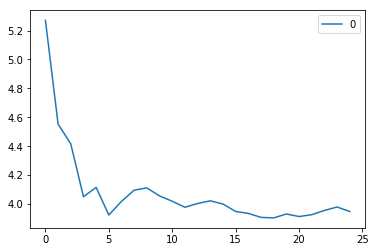

In [51]:
r=pd.DataFrame(rmse)
r.plot()     # take the value with lowest RMSE 

# This is underperforming the Linear Regression because the RMSE Score in LR(Check ML Day 1 Jupyter Notebook) is Less than this 

# Dictionary Method

In [52]:
rmse={}
for k in range(1,26,2):
    model=KNeighborsRegressor(n_neighbors=k,weights='uniform',metric='euclidean')
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    rmse[k]=np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    

rmse

{1: 5.2716142372774835,
 3: 4.416085915696706,
 5: 4.1147980914418305,
 7: 4.018355630452476,
 9: 4.111257755142349,
 11: 4.018984391259822,
 13: 4.003345987134034,
 15: 3.9997107302811195,
 17: 3.9348478966805733,
 19: 3.9035587026177807,
 21: 3.9129875130646465,
 23: 3.955055250598492,
 25: 3.9479638633942264}

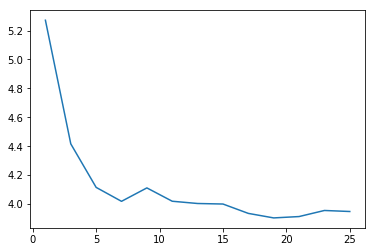

In [53]:
plt.plot(rmse.keys(),rmse.values())

In [54]:
from sklearn.model_selection import GridSearchCV


In [55]:
np.arange(1,30)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [56]:
params={'n_neighbors':np.arange(1,30)}

In [57]:
knn=KNeighborsRegressor()

In [58]:
gs=GridSearchCV(knn,params,cv=5)

In [59]:
gs.fit(x,y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
gs.best_params_

{'n_neighbors': 7}

In [61]:
model=KNeighborsRegressor(n_neighbors=7,weights='uniform',metric='euclidean')

In [62]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform')

In [63]:
y_predict=model.predict(x_test)

In [64]:
r2_score(y_test,y_predict)

0.7238237282044292

# Decision Tree Algorithm

In [65]:
entropy= ((5/9)*np.log2(5/9)+(4/9)*np.log2(4/9))

In [66]:
entropy

-0.9910760598382222

In [67]:
entropy= ((2/3)*np.log2(2/3)+(1/3)*np.log2(1/3))

In [68]:
entropy

-0.9182958340544896

In [69]:
#weighted Entropy at level 1 for the figure in notebook

(3/9)*0.91+(6/9)*1

0.97

In [70]:
0.99-0.97  # information gain 

0.020000000000000018

# Decision Tree Algorithm - Implementation


In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


In [72]:
from sklearn.tree import DecisionTreeClassifier


In [73]:
col=["Preg","Glc","BP","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

data=pd.read_csv("pima-indians-diabetes-1.data",names=col)

In [74]:
data.head()

,Preg,Glc,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
data["Outcome"]=data.Outcome.replace({0:'Helathy',1:'Diabetic'})

data["Outcome"]=data.Outcome.astype("category")

In [76]:
data.dtypes

Preg                           int64
Glc                            int64
BP                             int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [77]:
data.Outcome.value_counts()

Helathy     500
Diabetic    268
Name: Outcome, dtype: int64

In [78]:
y=data.Outcome
x=data.iloc[:,0:6]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [80]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [81]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
ypred=model.predict(x_test)

In [83]:
acc=metrics.accuracy_score(y_test,ypred)

In [84]:
print(acc)

0.7619047619047619


In [85]:
pd.crosstab(y_test,ypred)

col_0,Diabetic,Helathy
Outcome,,
Diabetic,45,31
Helathy,24,131


In [86]:
cr=metrics.classification_report(y_test,ypred)
print(cr)

              precision    recall  f1-score   support

    Diabetic       0.65      0.59      0.62        76
     Helathy       0.81      0.85      0.83       155

   micro avg       0.76      0.76      0.76       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



In [87]:
print(pd.DataFrame(model.feature_importances_,columns=["IMP"],index=x_train.columns)) 
# shows the ranking of variables,higher the value it is more used in the model

                    IMP
Preg           0.077065
Glc            0.628260
BP             0.000000
SkinThickness  0.000000
Insulin        0.000000
BMI            0.294675


In [88]:
from IPython.display import Image                  # to plot the decision Tree
from sklearn import tree
from os import system

In [89]:
Diabetic_file=open('diabetes_tree.dot','w')

In [90]:
dot_data=tree.export_graphviz(model,out_file=Diabetic_file,feature_names=list(x_train),class_names=y_train)

In [91]:
Diabetic_file.close()

In [92]:
system("dot -Tpng diabetes_tree.dot -o diabetes_tree.png ")
Image("diabetes_tree.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [93]:
params={'max_depth':np.arange(1,25)}
DT=DecisionTreeClassifier(criterion='entropy',random_state=2)
gs=GridSearchCV(DT,params,cv=5)



In [94]:
gs.fit(x,y)
gs.best_params_


{'max_depth': 3}

In [95]:
gs.best_score_

0.7421875